In [2]:
# Libraries for reading and working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries to assist with animation and visualisations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import cartopy.crs as ccrs
from IPython.display import HTML

In [3]:
# file_path = '/glade/scratch/joko/cm1-iceball-testrun/cm1out_000049.nc'
# ds = xr.open_dataset(file_path)
# ds_vert = ds.isel(yh=128) 
# variables = ['qi1', 'qi2', 'qi3', 'qi4']
# ds_qi = ds_vert[variables]
# ds_qi = ds_qi.drop_vars('yh')

In [4]:
# ds_qi

In [5]:
# fig, ax = plt.subplots(figsize=(10, 5))
# da = ds_qi['qi1']
# im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[0, :, :], cmap='Blues_r', alpha=0.8)
# cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
# cbar.set_label('ice mixing ratio [kg/kg]')

In [6]:
# parse files and concatenate into single ds
import os, glob
from pathlib import Path
folder = '/glade/scratch/joko/cm1-iceball-testrun'
ds_list = []
for f in sorted(glob.glob(os.path.join(folder, 'cm1out_0*'))):
    ds = xr.open_dataset(f)
    ds_vert = ds.isel(yh=128) 
    variables = ['qi1', 'qi2', 'qi3', 'qi4']
    ds_qi = ds_vert[variables]
    ds_qi = ds_qi.drop_vars('yh')
    ds_list.append(ds_qi)
    
ds = xr.concat(ds_list, dim = 'time')

# print(ds_list[0])    

In [7]:
ds_subset = ds.isel(time=slice(10,None))
ds_subset

<xarray.Dataset>
Dimensions:  (time: 39, zh: 280, xh: 256)
Coordinates:
  * time     (time) timedelta64[ns] 00:50:00 00:55:00 ... 03:55:00 04:00:00
  * xh       (xh) float32 0.025 0.075 0.125 0.175 ... 12.63 12.68 12.73 12.78
  * zh       (zh) float32 0.025 0.075 0.125 0.175 ... 13.83 13.88 13.93 13.98
Data variables:
    qi1      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi2      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi3      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qi4      (time, zh, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/71)
    CM1 version:    cm1r21.0
    Conventions:    CF-1.7
    missing_value:  -999999.9
    x_units:        km
    x_label:        x
    y_units:        km
    ...             ...
    cgt1:           1.875
    cgt2:           -1.25
    cgt3:           0.375
    dgt1:           2.0
    dgt2:           -3.0
    dgt3:           1.0

# Class 1: Planar

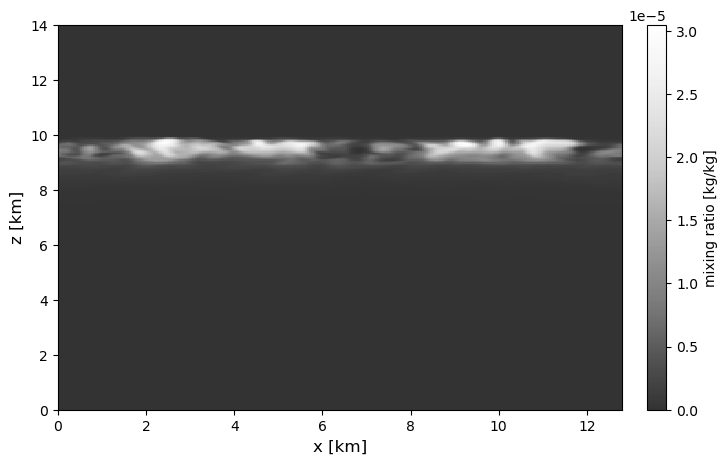

In [141]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds_subset['qi1']
im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('mixing ratio [kg/kg]')

In [142]:
# create function that will be called by animation object
frames = 39
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Planar Ice Mixing Ratio [kg/kg], {str(seconds)} seconds', fontsize=12)

In [143]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)

In [144]:
# # display w/ Javascript
# HTML(ani.to_jshtml())

In [145]:
save_dir = '/glade/u/home/joko'
ani.save(f'{save_dir}/iceball_bulk_les_planar.gif') # save as gif

# Class 2: columns

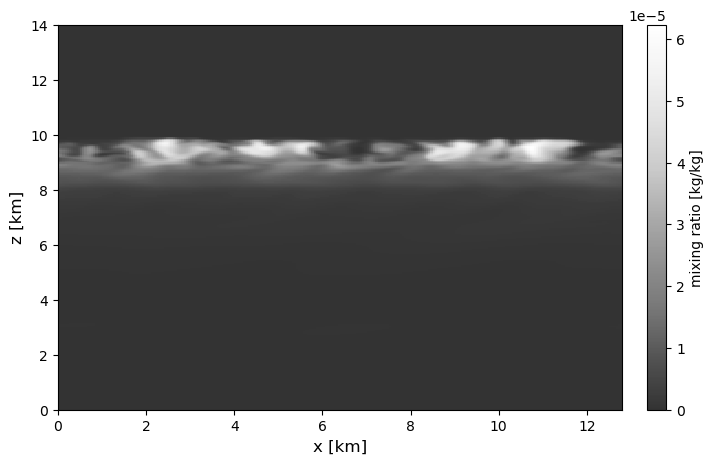

In [146]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds_subset['qi2']
im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('mixing ratio [kg/kg]')

In [147]:
# create function that will be called by animation object
frames = 39
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Columnar Ice Mixing Ratio [kg/kg], {str(seconds)} seconds', fontsize=12)

In [148]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
# HTML(ani.to_jshtml())

In [149]:
ani.save(f'{save_dir}/iceball_bulk_les_columnar.gif') # save as gif

# Class 3: Aggregates

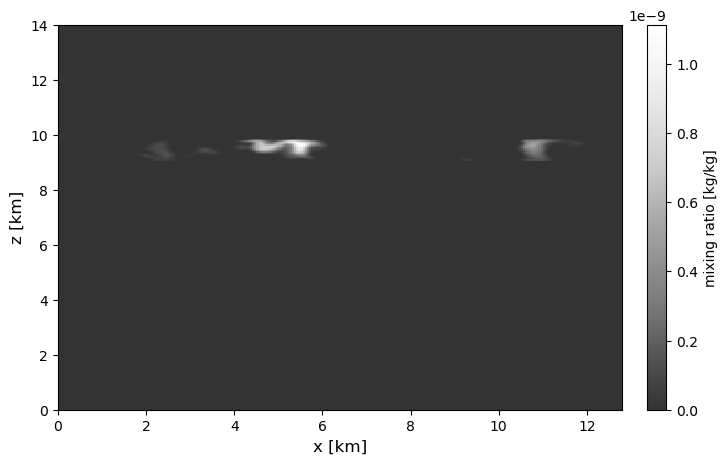

In [135]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds_subset['qi3']
im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('mixing ratio [kg/kg]')

In [136]:
# create function that will be called by animation object
frames = 39
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Aggregate Ice Mixing Ratio [kg/kg], {str(seconds)} seconds', fontsize=12)

In [137]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
# HTML(ani.to_jshtml())
ani.save(f'{save_dir}/iceball_bulk_les_agg.gif') # save as gif

# Class 4: Polycrystals

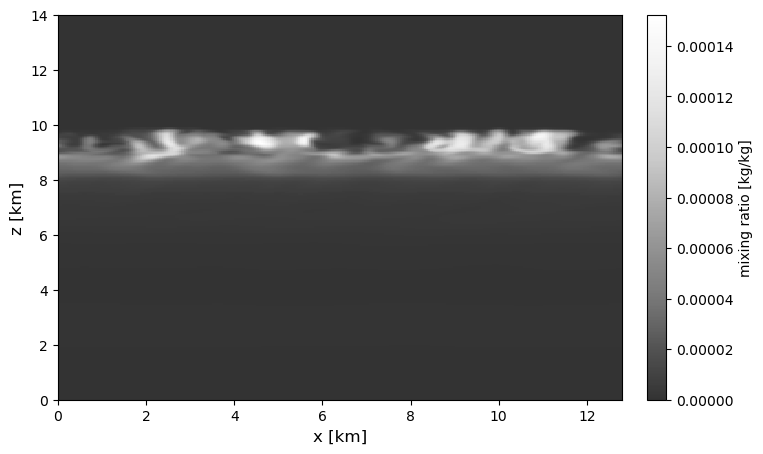

In [138]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 5))
da = ds_subset['qi4']
im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
ax.set_xlabel('x [km]', fontsize=12)
ax.set_ylabel('z [km]', fontsize=12)
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('mixing ratio [kg/kg]')

In [139]:
# create function that will be called by animation object
frames = 39
def animate(i):
    array = da[i, :, :].values
    im.set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax.set_title(f'Polycrystal Ice Mixing Ratio [kg/kg], {str(seconds)} seconds', fontsize=12)

In [140]:
# create animation object
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
# HTML(ani.to_jshtml())
ani.save(f'{save_dir}/iceball_bulk_les_poly.gif') # save as gif

# Gridded GIF

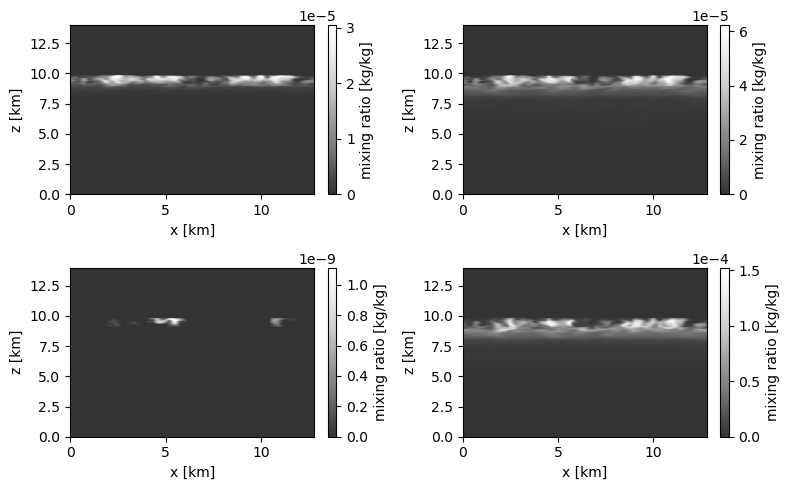

In [13]:
# initialize plot
import matplotlib.ticker
fig, ax_grid = plt.subplots(2, 2, figsize=(8, 5))
# da = ds_subset['qi3']
# im = plt.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
var_list = ['qi1', 'qi2', 'qi3', 'qi4']
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-2,2)) 
counter = 0 
im_list = [] 
for i in range(2):
    for j in range(2):
        ax = ax_grid[i, j]
        variable = var_list[counter]
        da = ds_subset[variable]
        im = ax.pcolormesh(ds_qi.xh, ds_qi.zh, da[20, :, :], cmap='Greys_r', alpha=0.8)
        im_list.append(im)
        ax.set_xlabel('x [km]', fontsize=10)
        ax.set_ylabel('z [km]', fontsize=10)
        cbar = plt.colorbar(im, ax=ax, fraction=0.05, pad=0.05, format=cbformat)
        cbar.set_label('mixing ratio [kg/kg]')
        counter += 1
fig.tight_layout()

In [14]:
# create function that will be called by animation object
frames = 39
def animate(i):
    # qi1 
    da = ds['qi1']
    array = da[i, :, :].values
    im_list[0].set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax_grid[0,0].set_title(f'Planar, {str(seconds)} seconds', fontsize=8)
    
    # qi2 
    da = ds['qi2']
    array = da[i, :, :].values
    im_list[1].set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax_grid[0,1].set_title(f'Columnar, {str(seconds)} seconds', fontsize=8)
    
    # qi13
    da = ds['qi3']
    array = da[i, :, :].values
    im_list[2].set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax_grid[1,0].set_title(f'Aggregate, {str(seconds)} seconds', fontsize=8)
    
    # qi4 
    da = ds['qi4']
    array = da[i, :, :].values
    im_list[3].set_array(array.flatten())
    seconds = da.time[i].values / np.timedelta64(1, 's')
    ax_grid[1,1].set_title(f'Polycrystal, {str(seconds)} seconds', fontsize=8)

In [15]:
# create animation object
save_dir = '/glade/u/home/joko'
ani = animation.FuncAnimation(fig, animate, frames, interval=150)
# HTML(ani.to_jshtml())
ani.save(f'{save_dir}/iceball_bulk_les_grid.gif') # save as gif